#**Fase4 - YOLOv11 (You Only Look Once) - Fine-Tune Aperto de Mão**

**Step 01 # Instalação do pacote Ultralytics e Roboflow**

In [8]:
!pip install ultralytics roboflow

**Step 02 # Import das bibliotecas**

In [9]:
import ultralytics
from ultralytics import YOLO
from IPython.display import Image

ultralytics.checks()

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/235.7 GB disk)


**Step # 03 Download dataset handshake - https://universe.roboflow.com/meerab-z/handshake**

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="aRIXljKOpNbbIj3L2syH")
project = rf.workspace("meerab-z").project("handshake")
version = project.version(2)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to HandShake-2 in yolov11:: 100%|██████████| 1946/1946 [00:00<00:00, 5762.68it/s]


In [10]:
dataset.location

'/content/HandShake-2'

**Step # 04 Treino do modelo YOLO11 em um dataset customizado de apertos de mão**

In [11]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=40 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 406MB/s]
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/HandShake-2/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

**Step # 05 Resultado do treino**

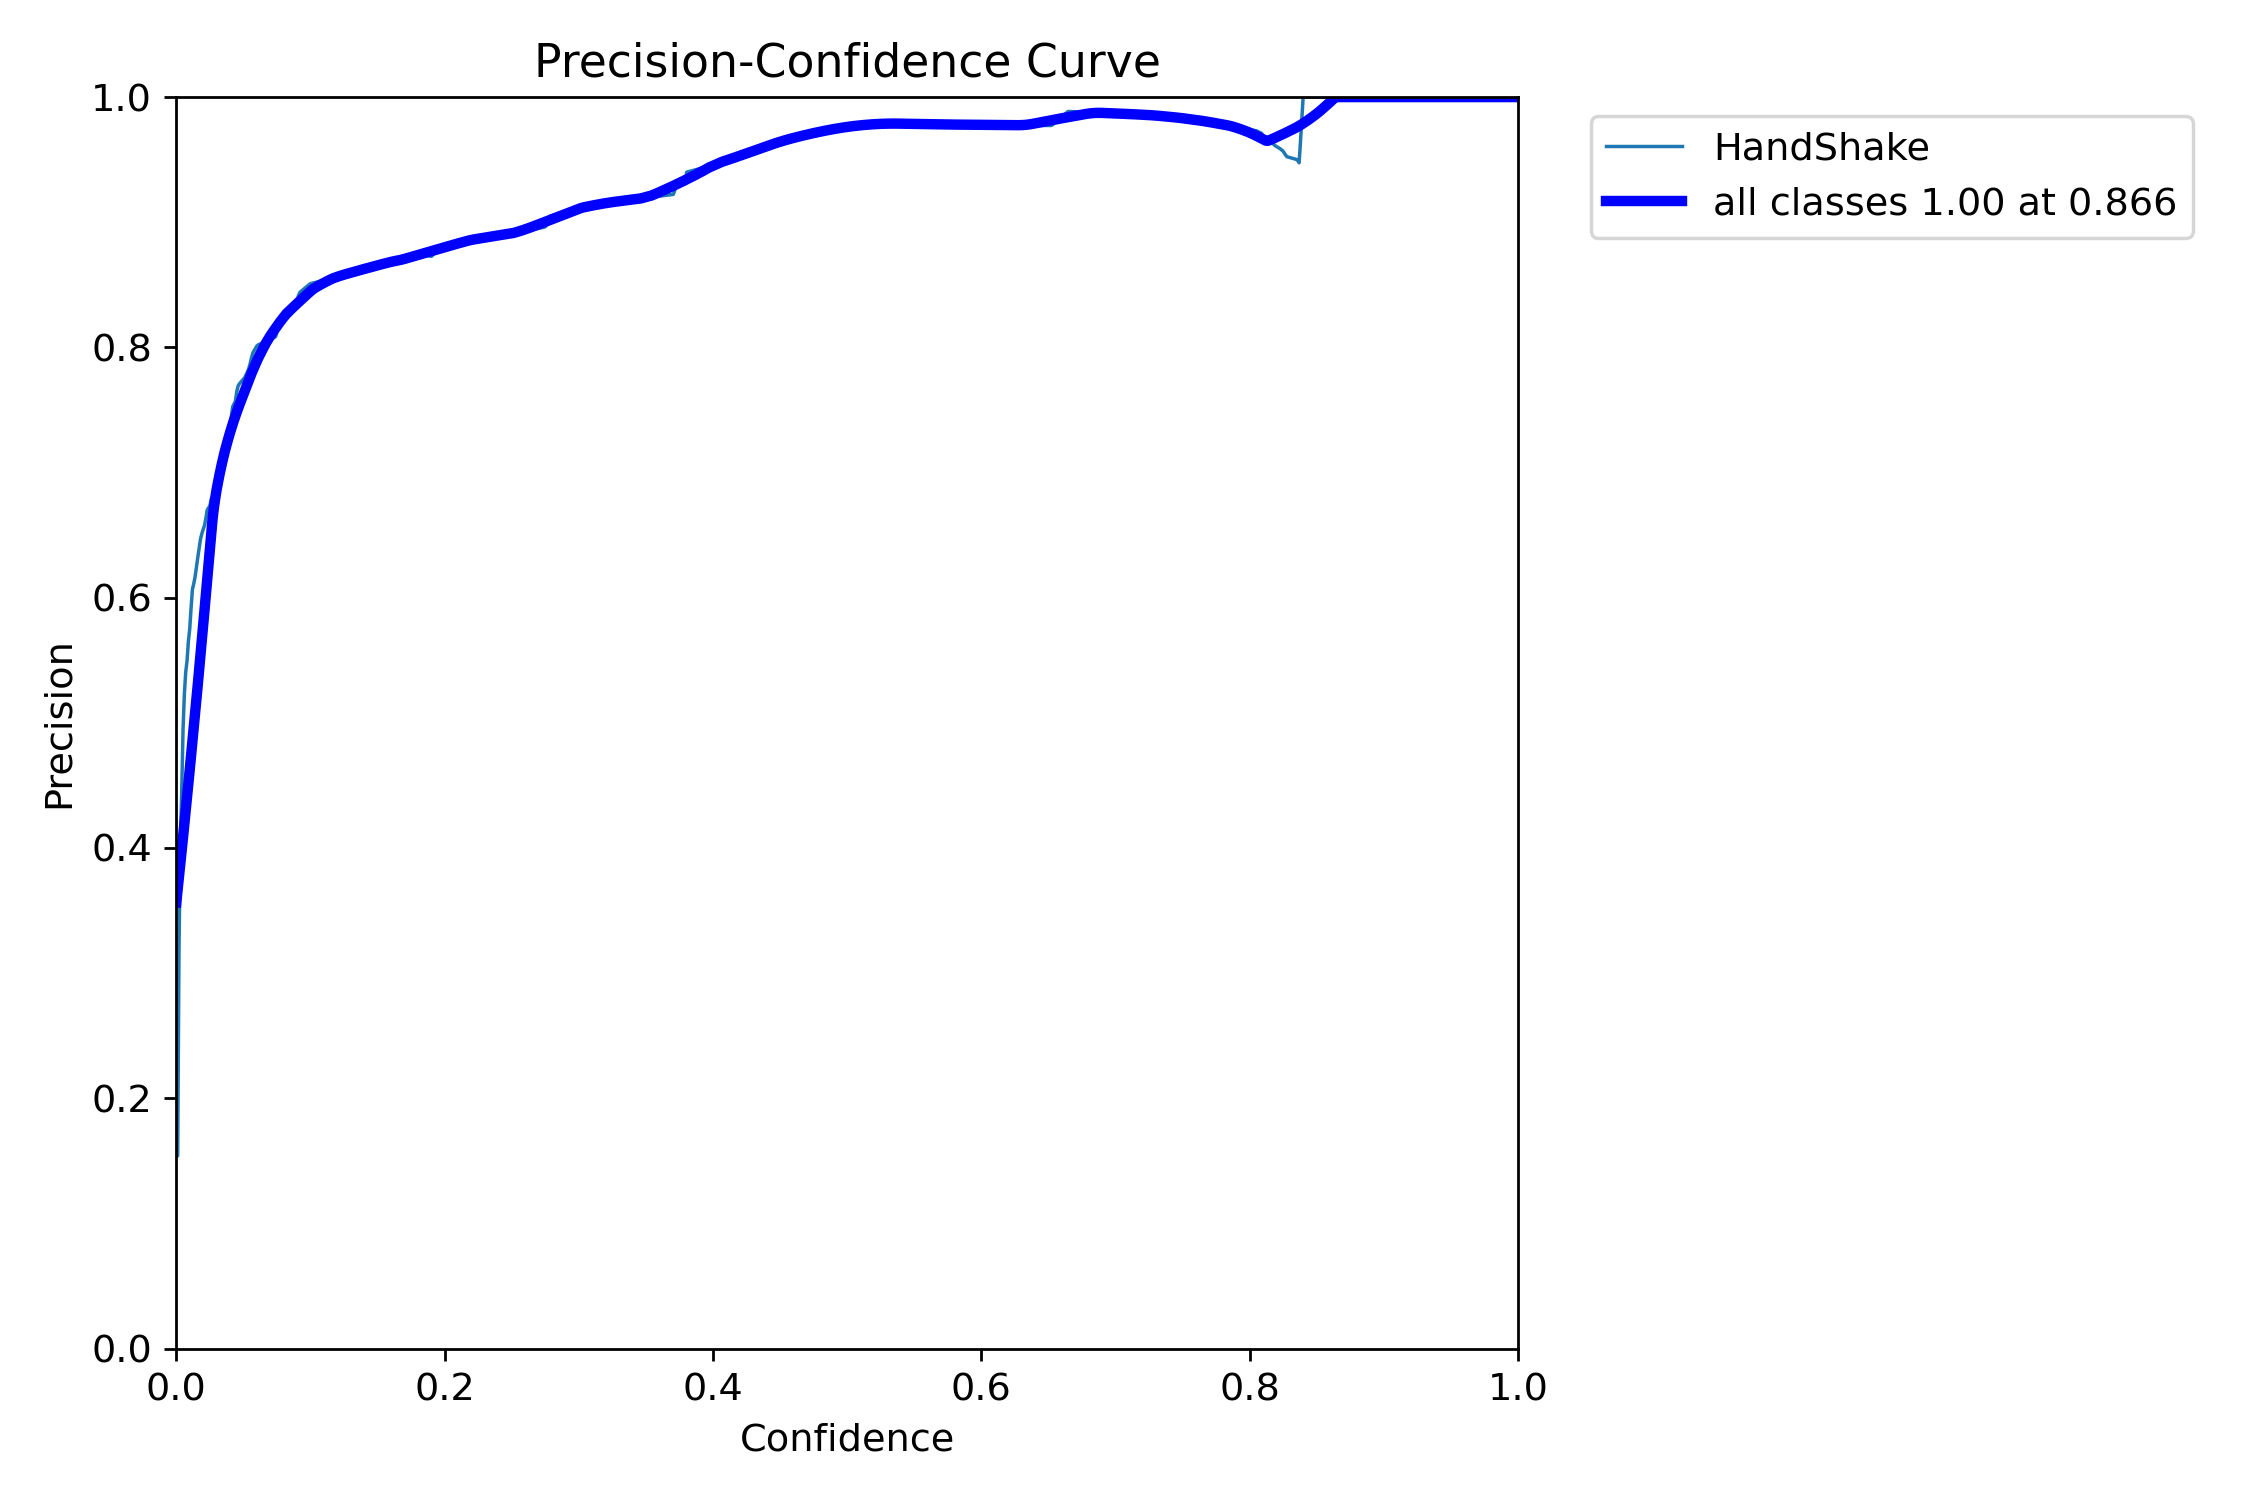

In [12]:
Image("/content/runs/detect/train/P_curve.png", width=600)

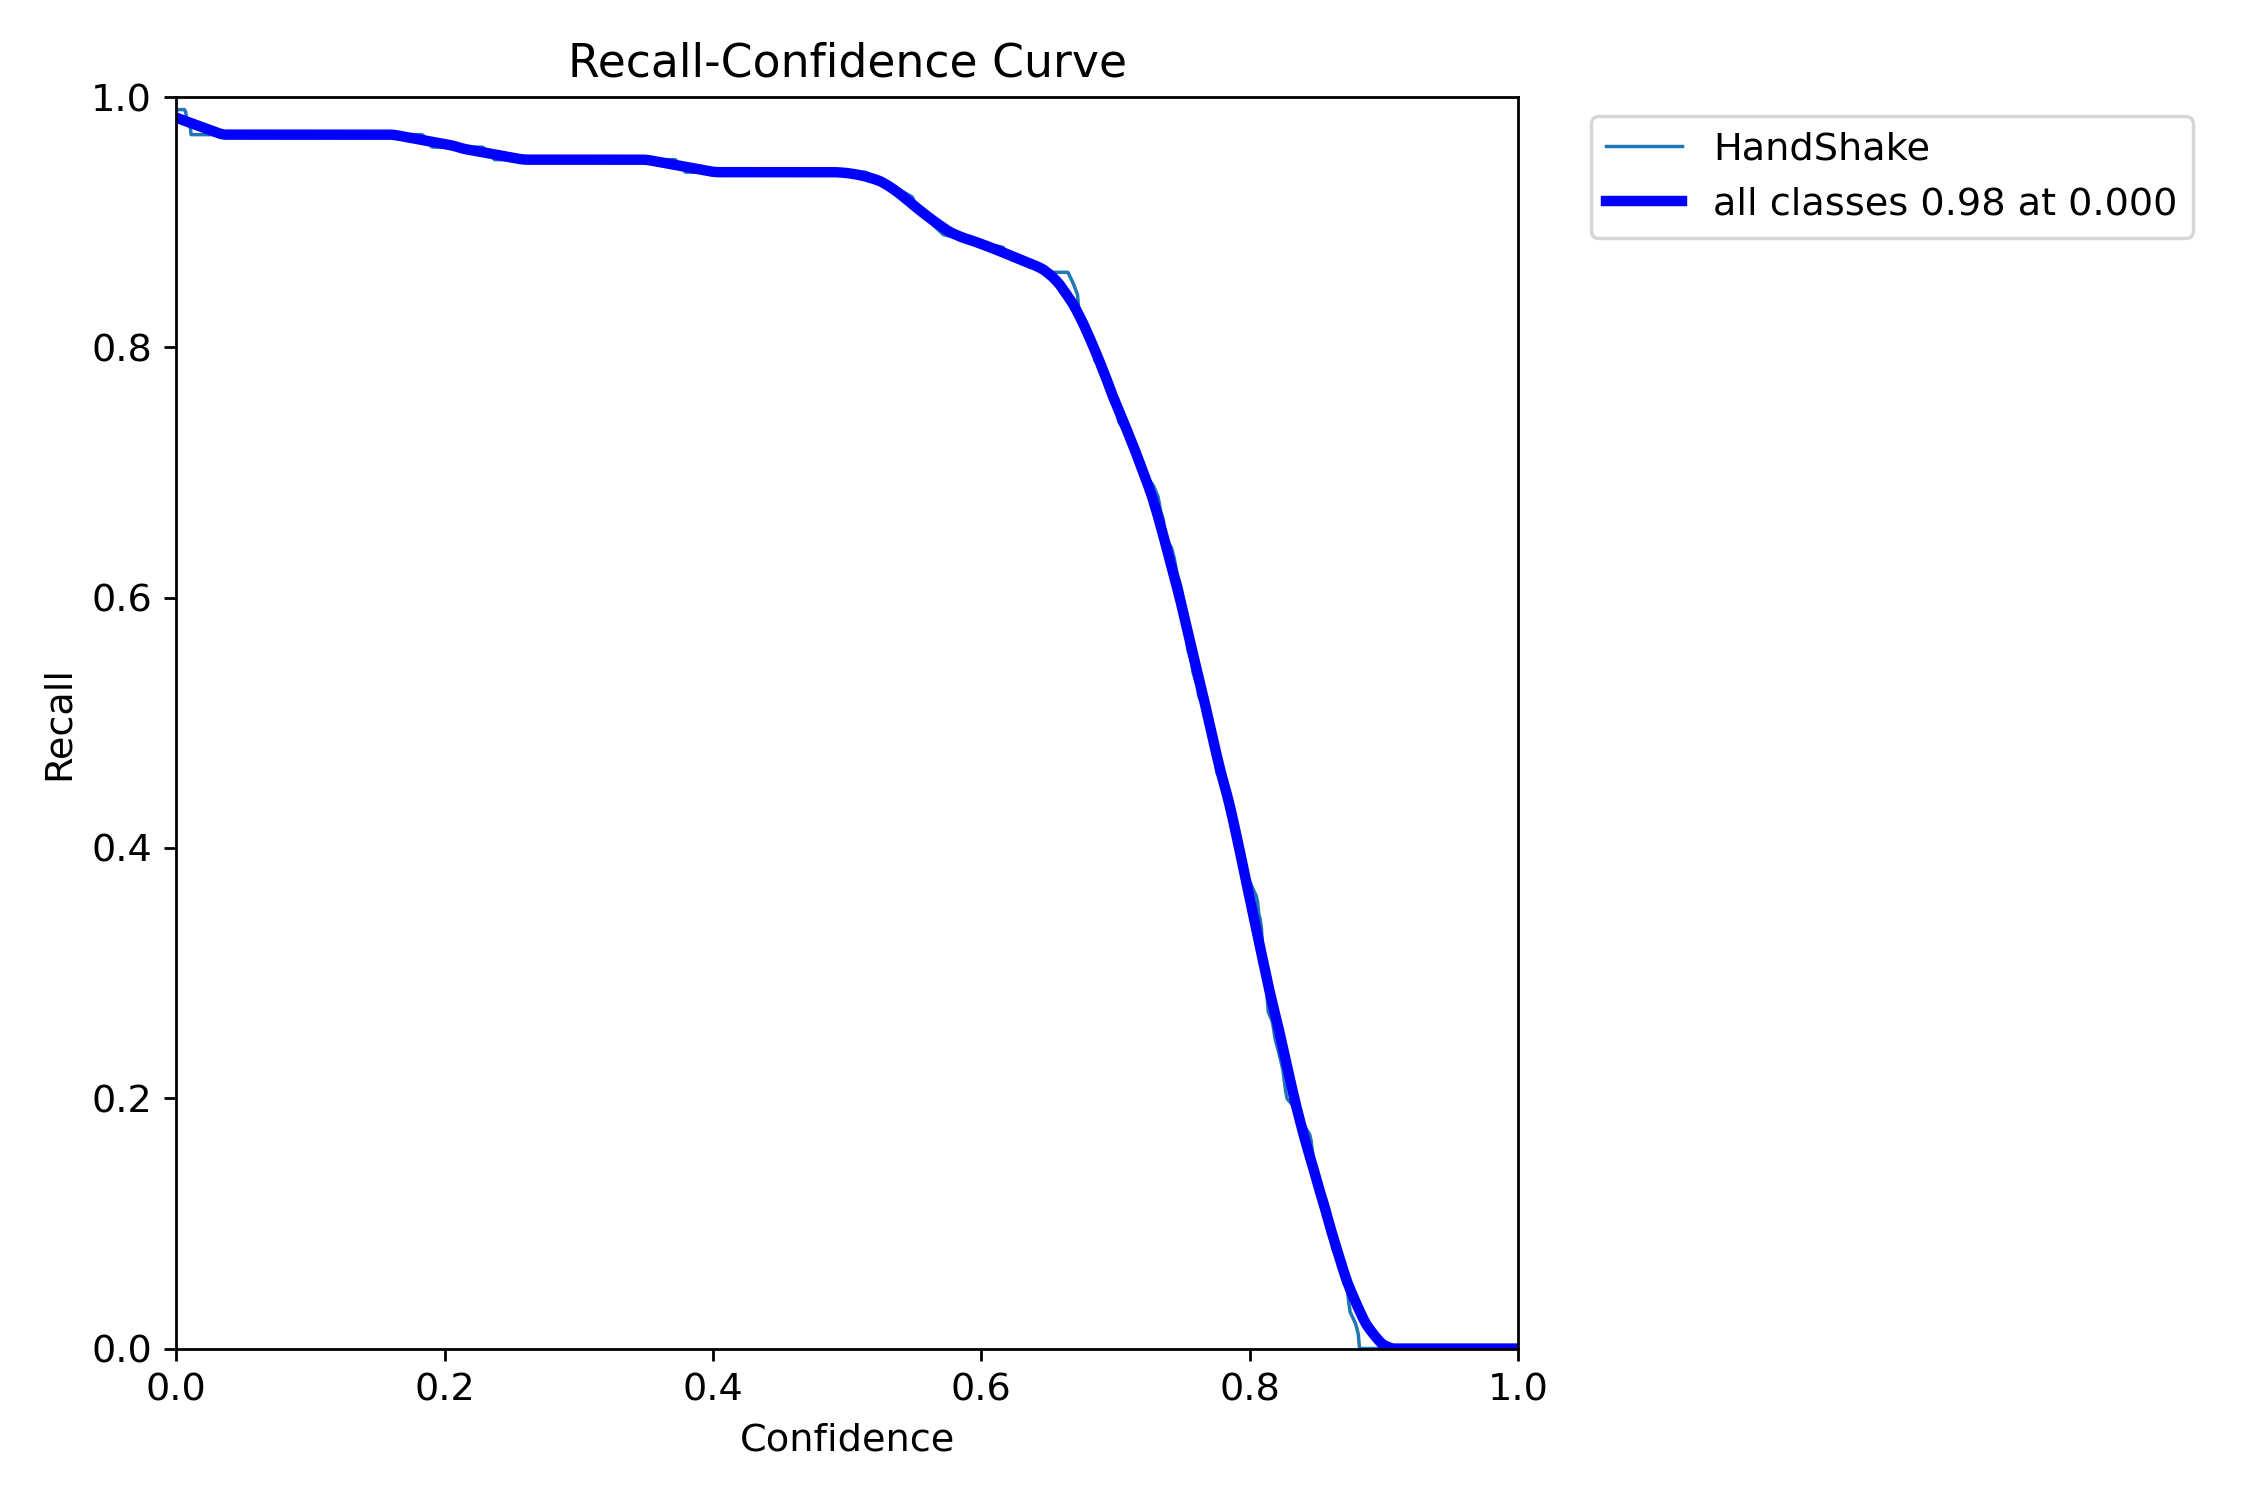

In [13]:
Image("/content/runs/detect/train/R_curve.png", width=600)

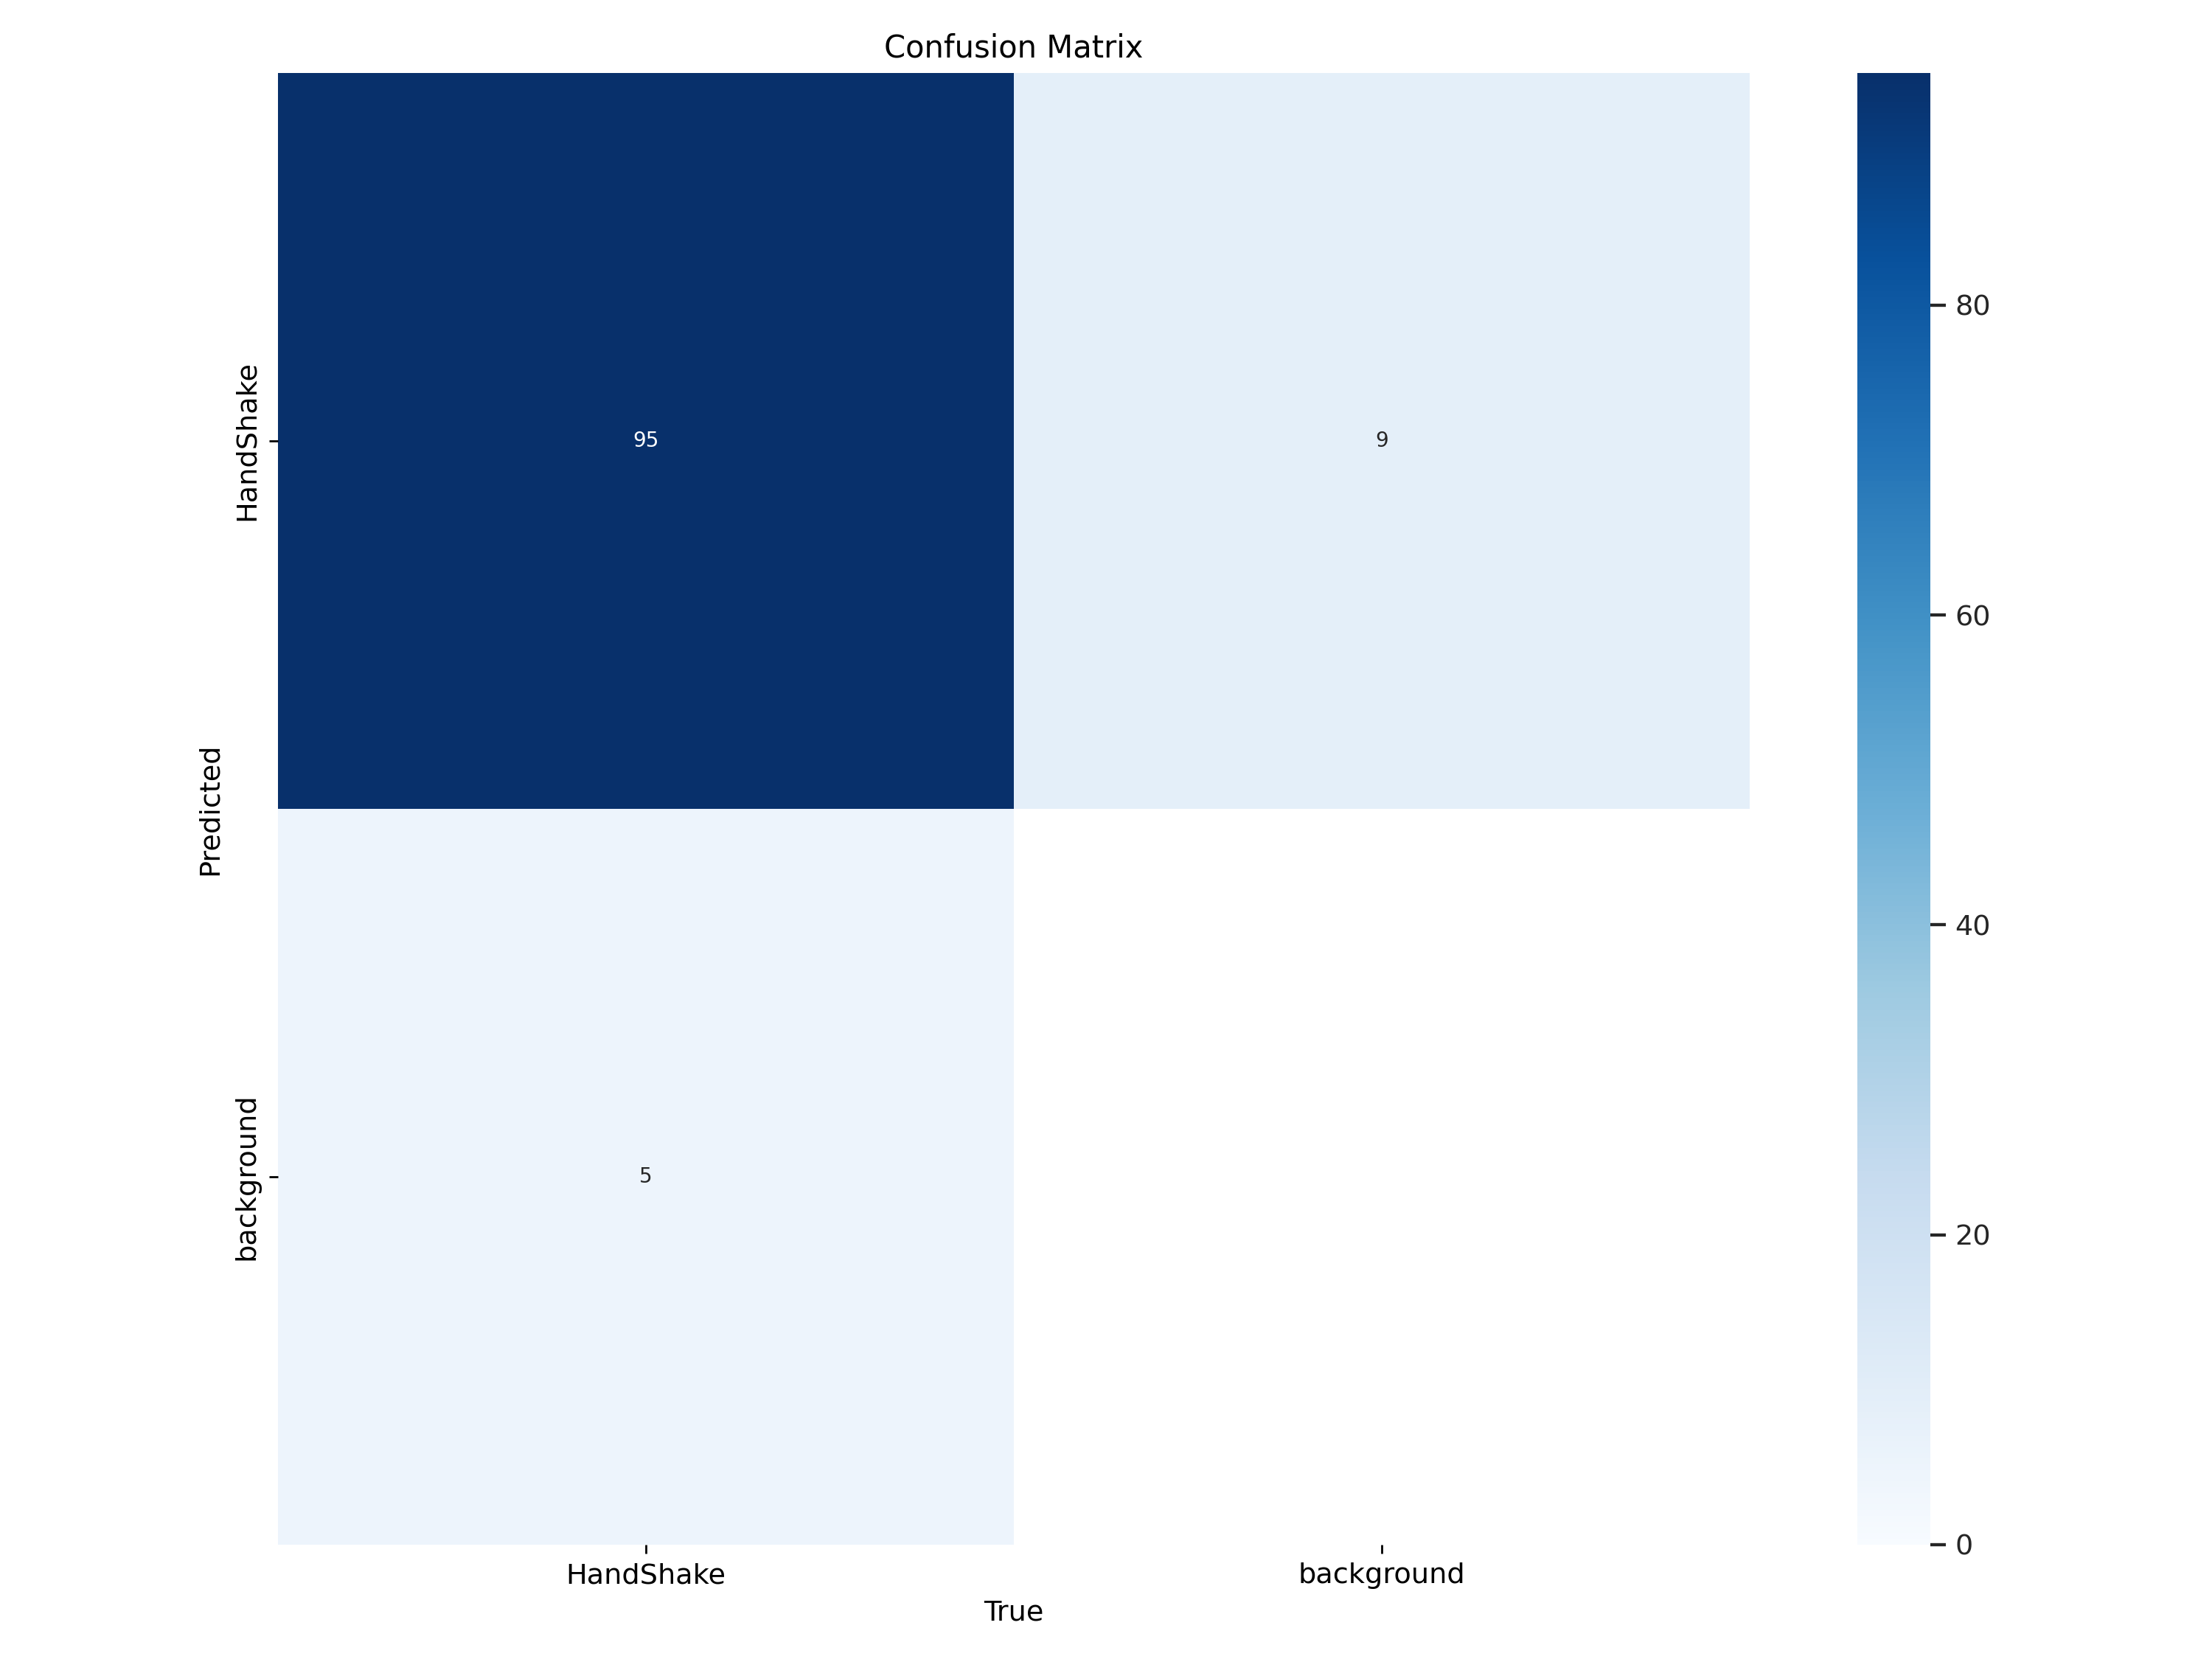

In [14]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

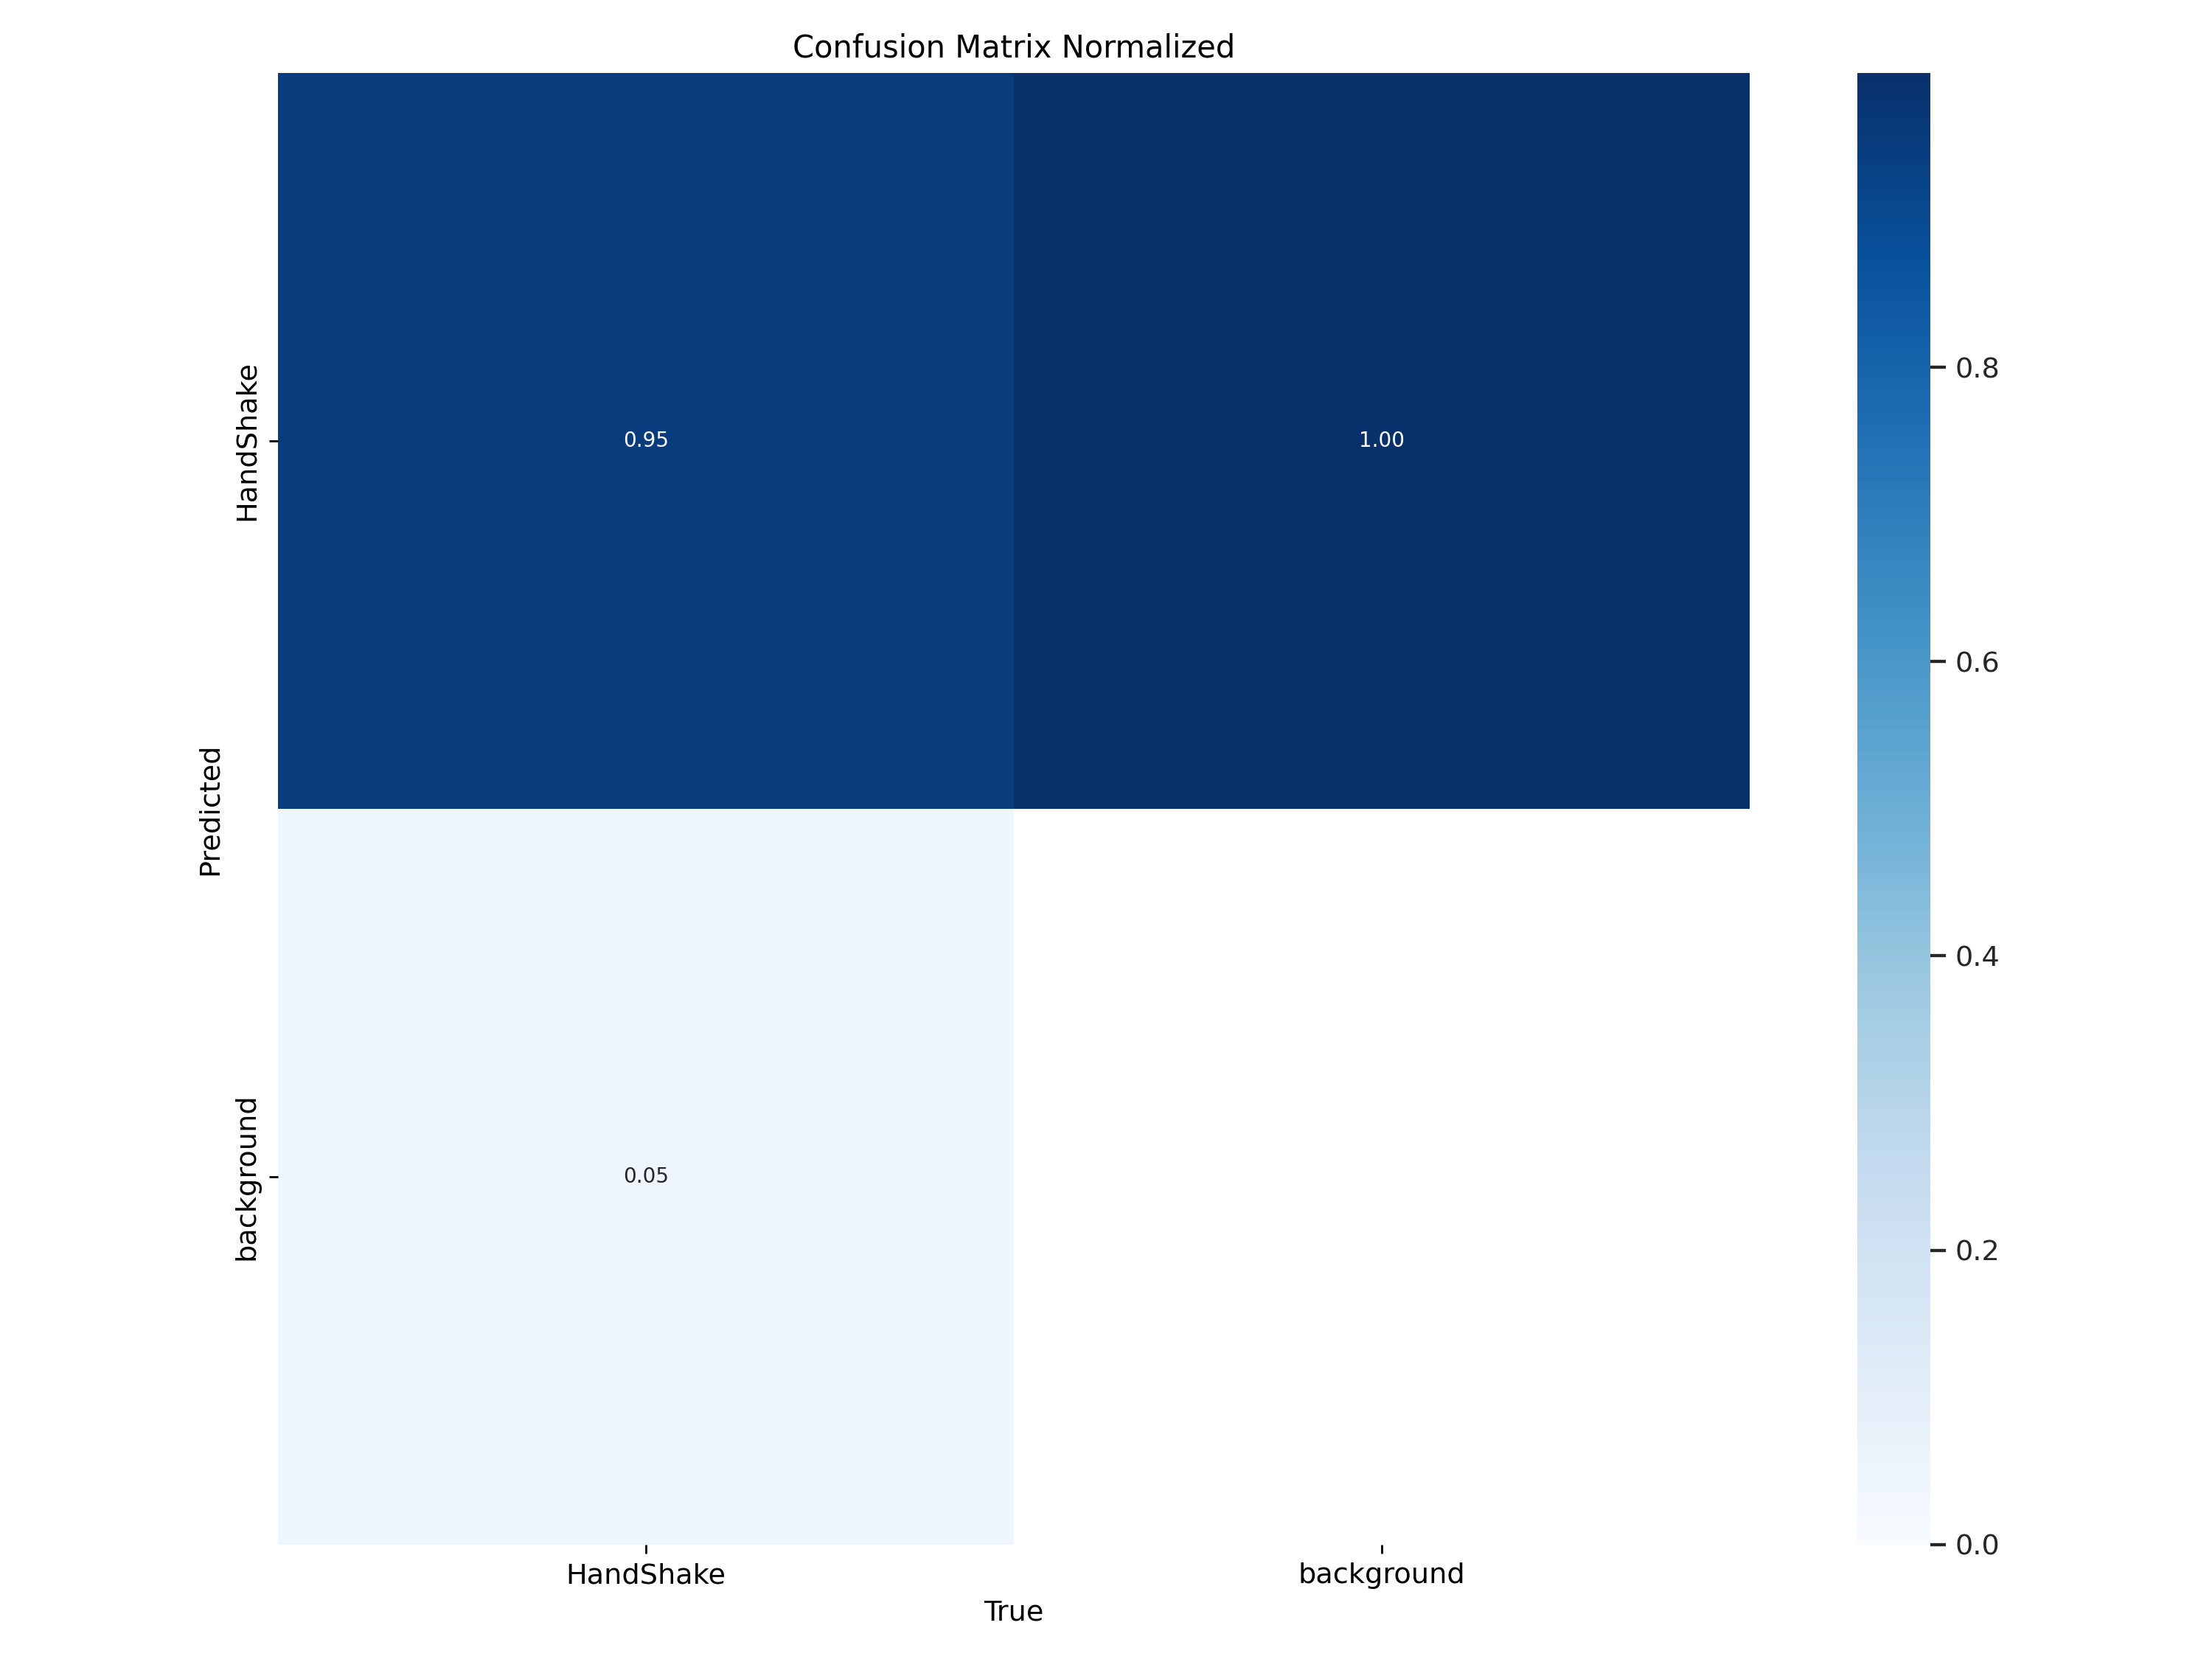

In [15]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

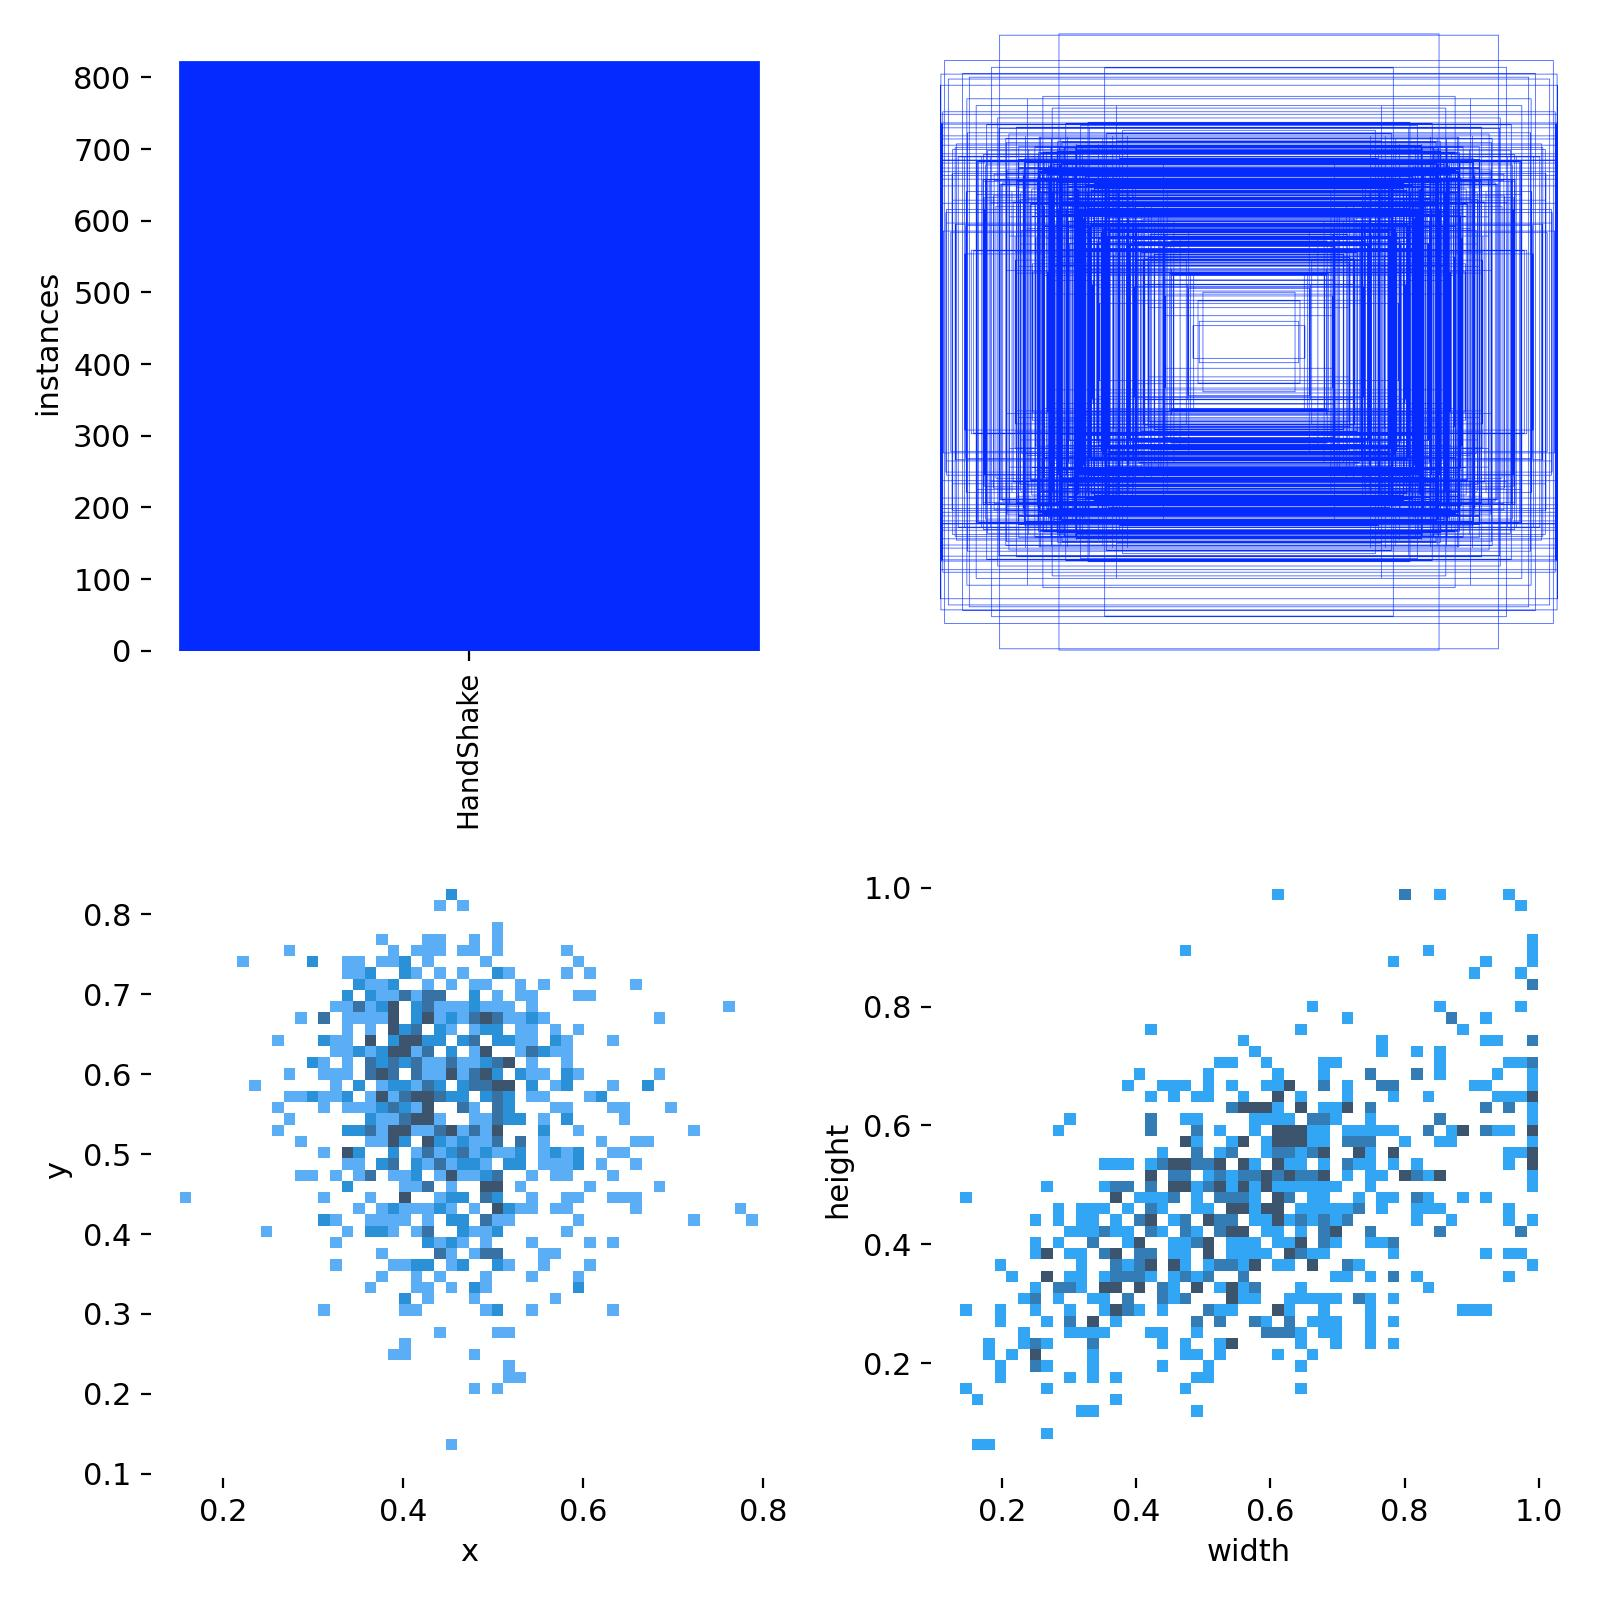

In [16]:
Image("/content/runs/detect/train/labels.jpg", width=600)

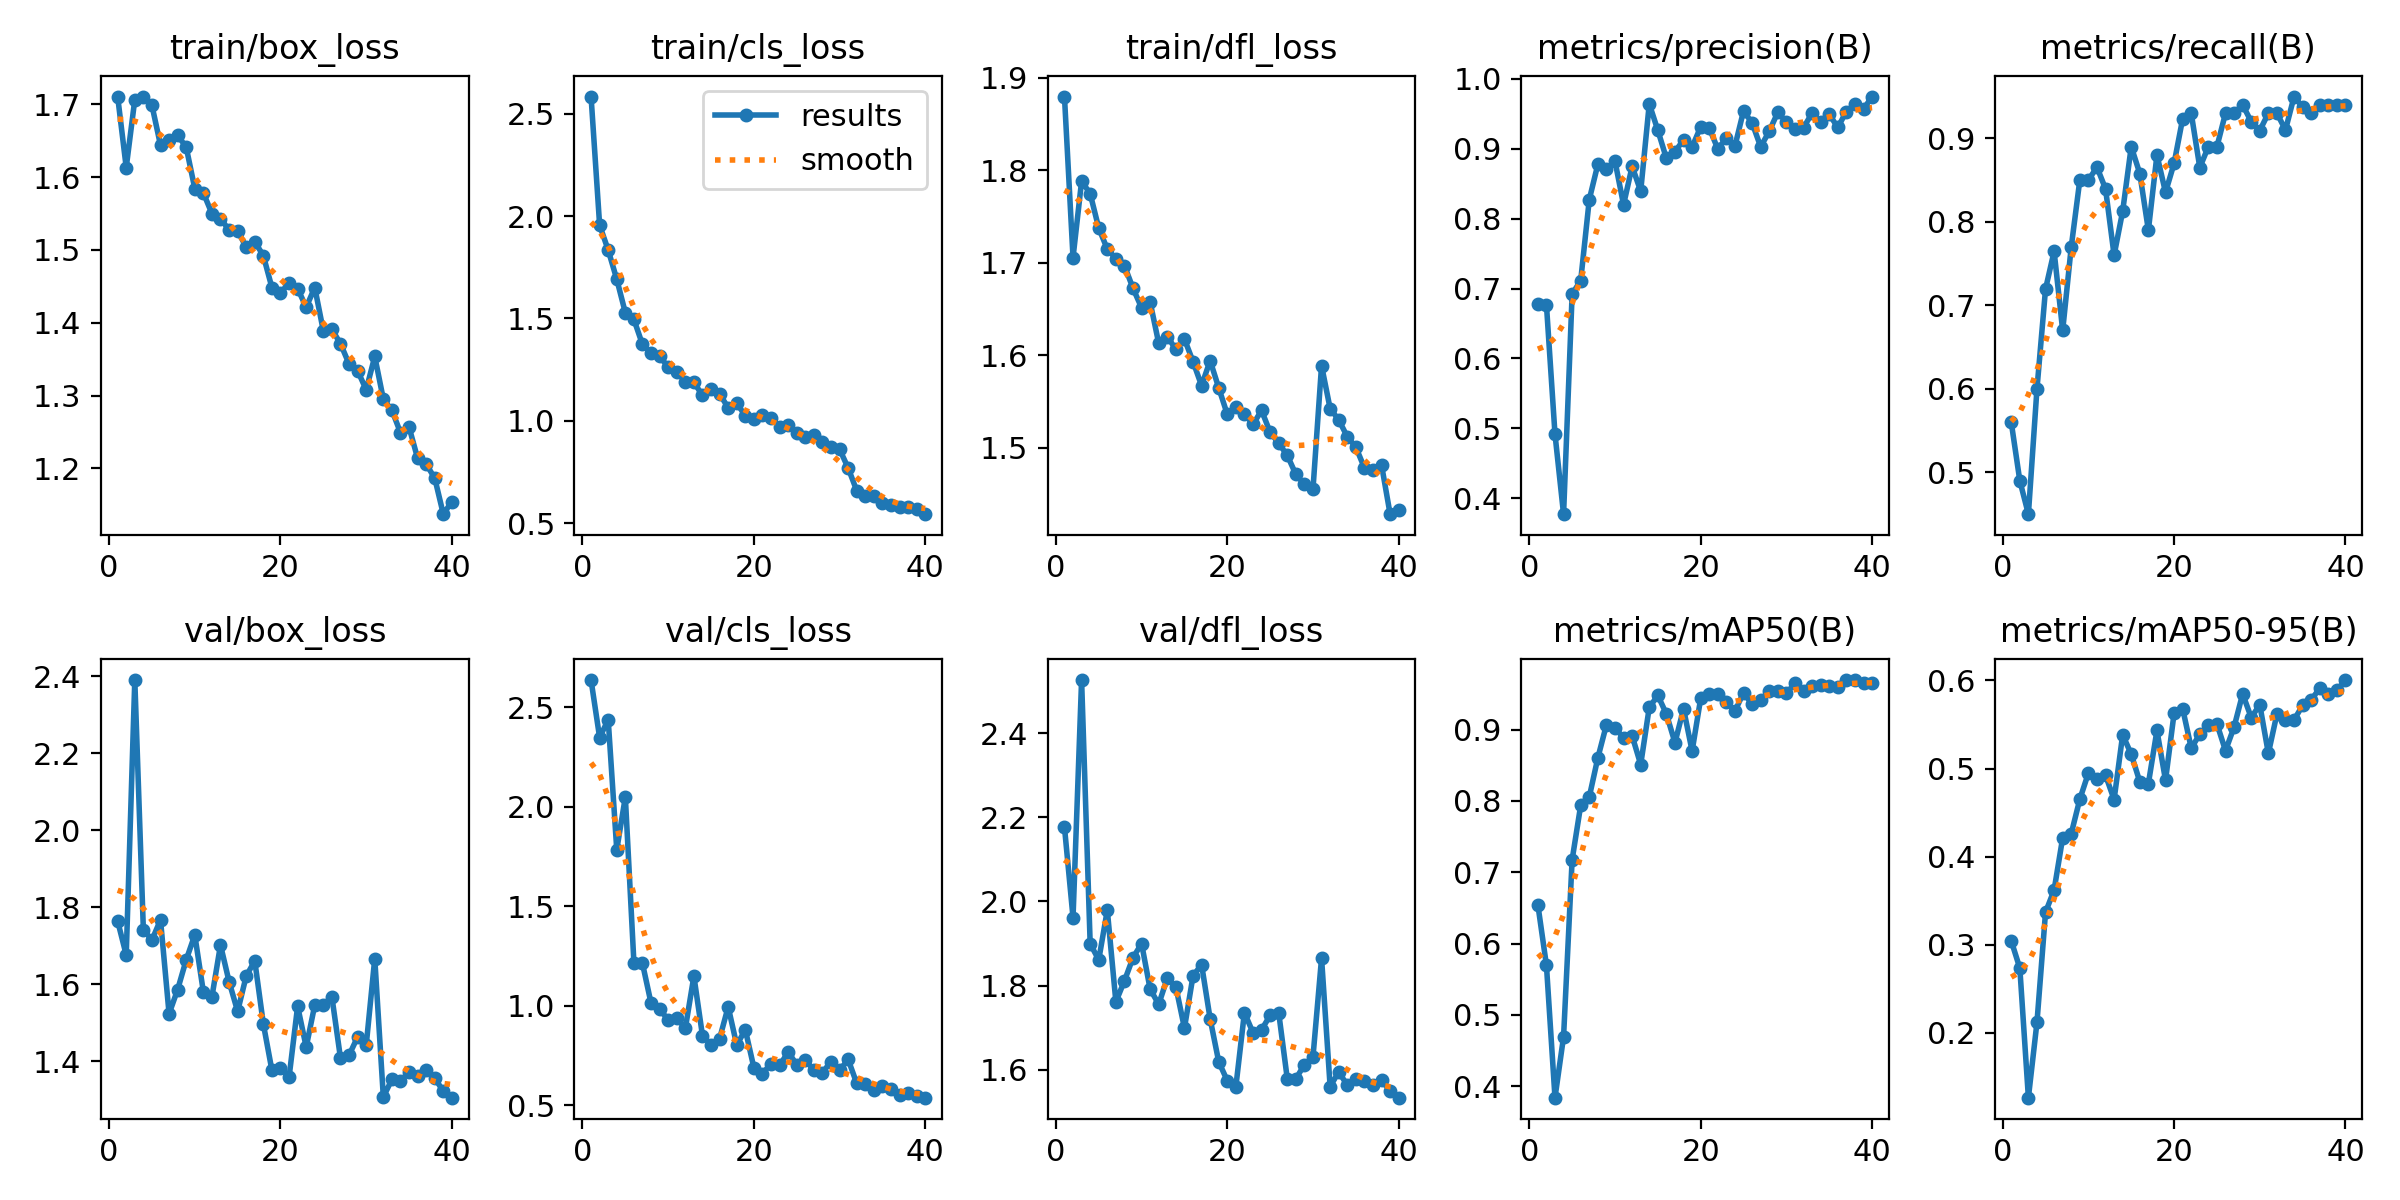

In [17]:
Image("/content/runs/detect/train/results.png", width=600)

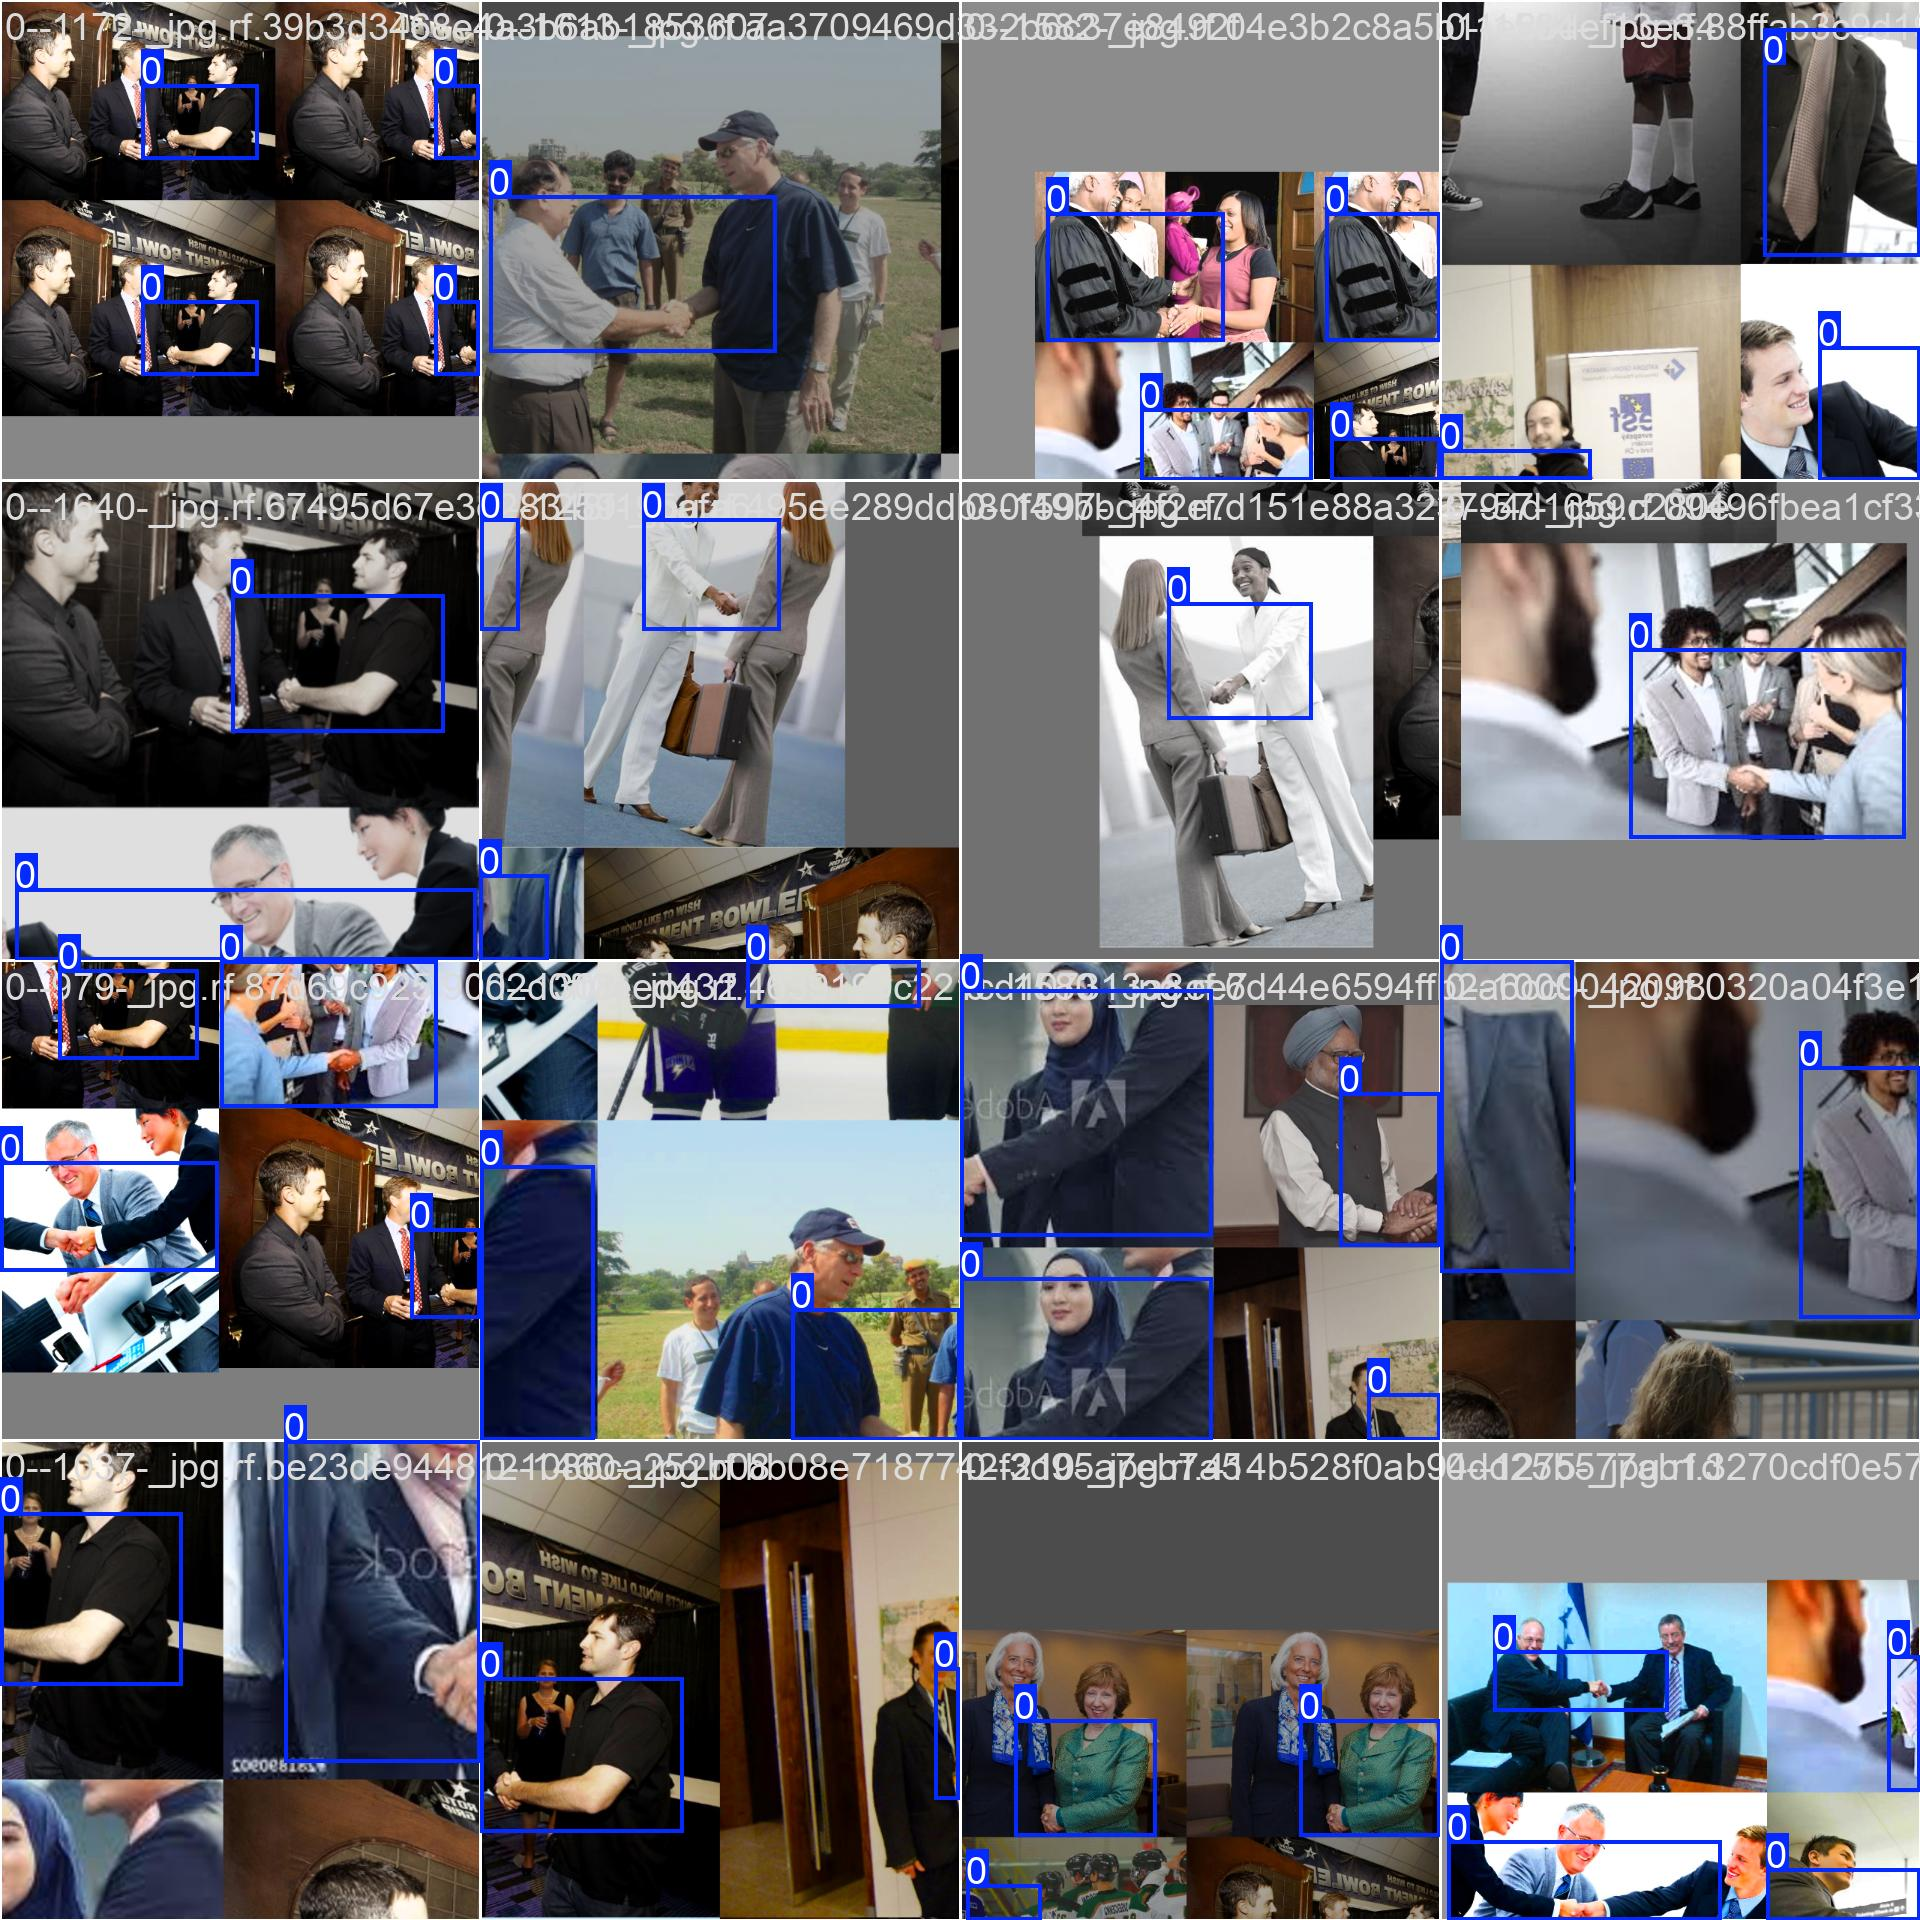

In [18]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

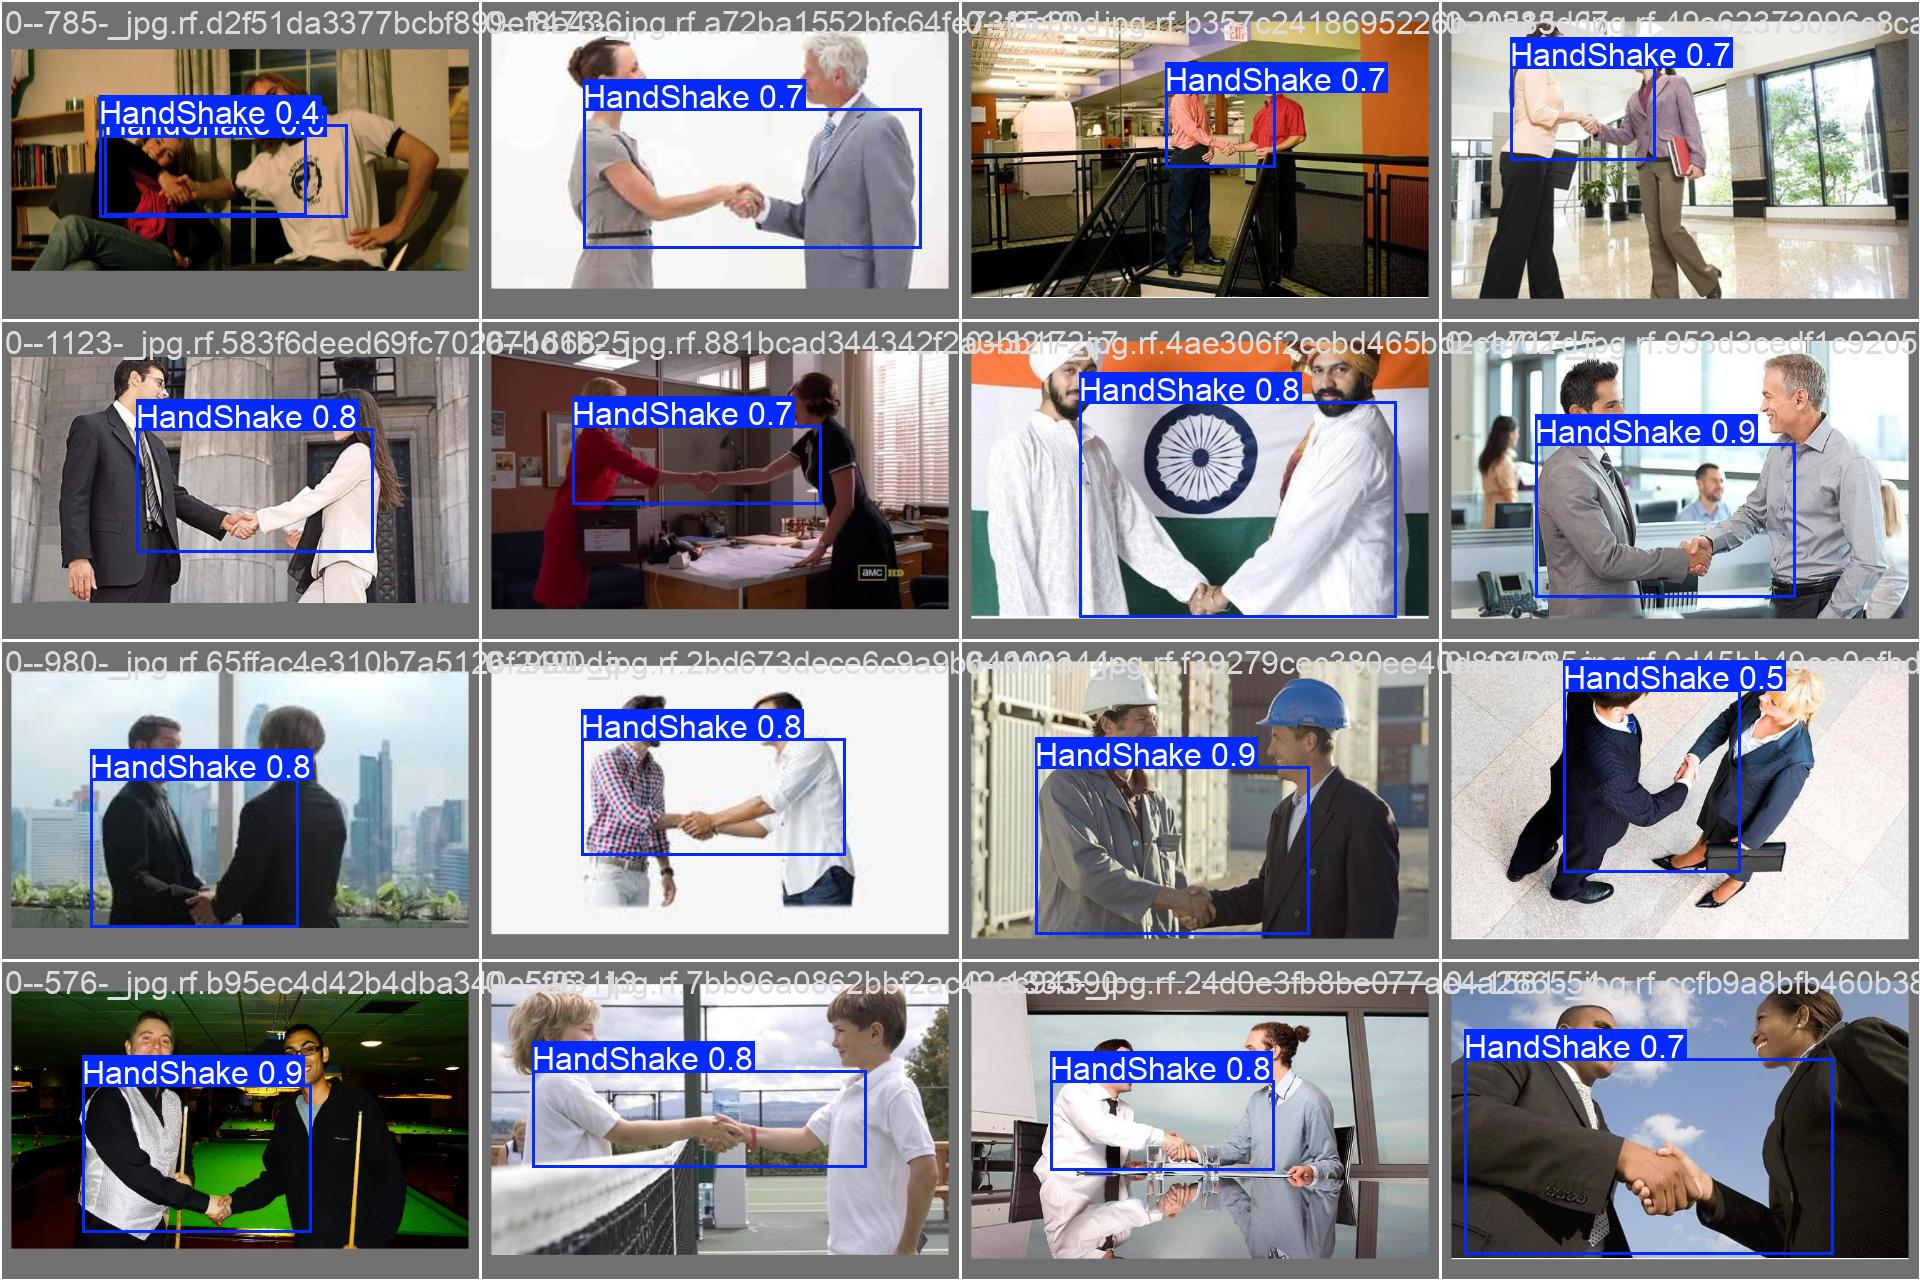

In [19]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

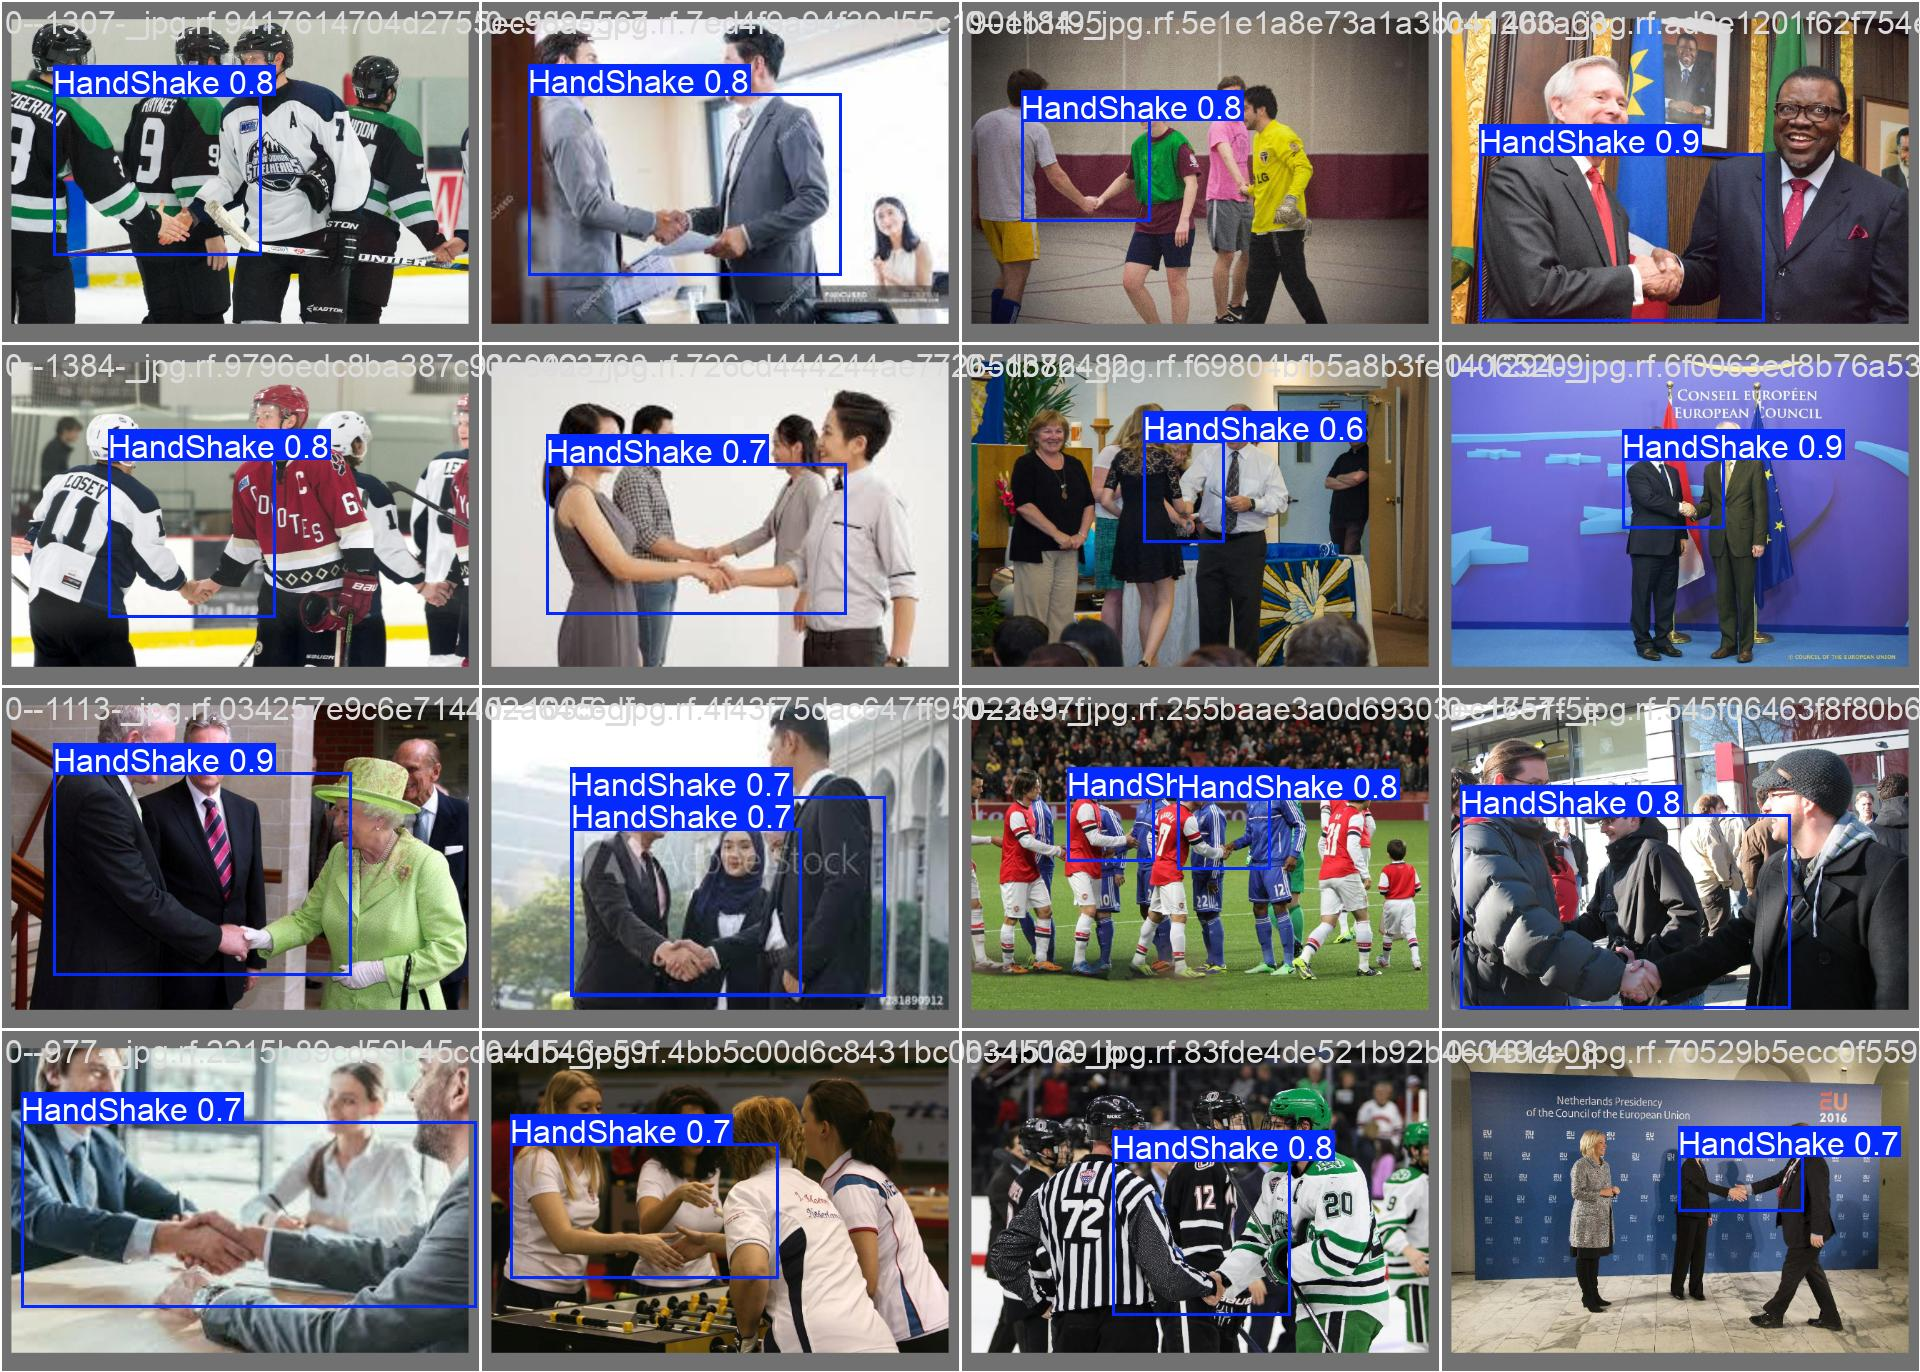

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

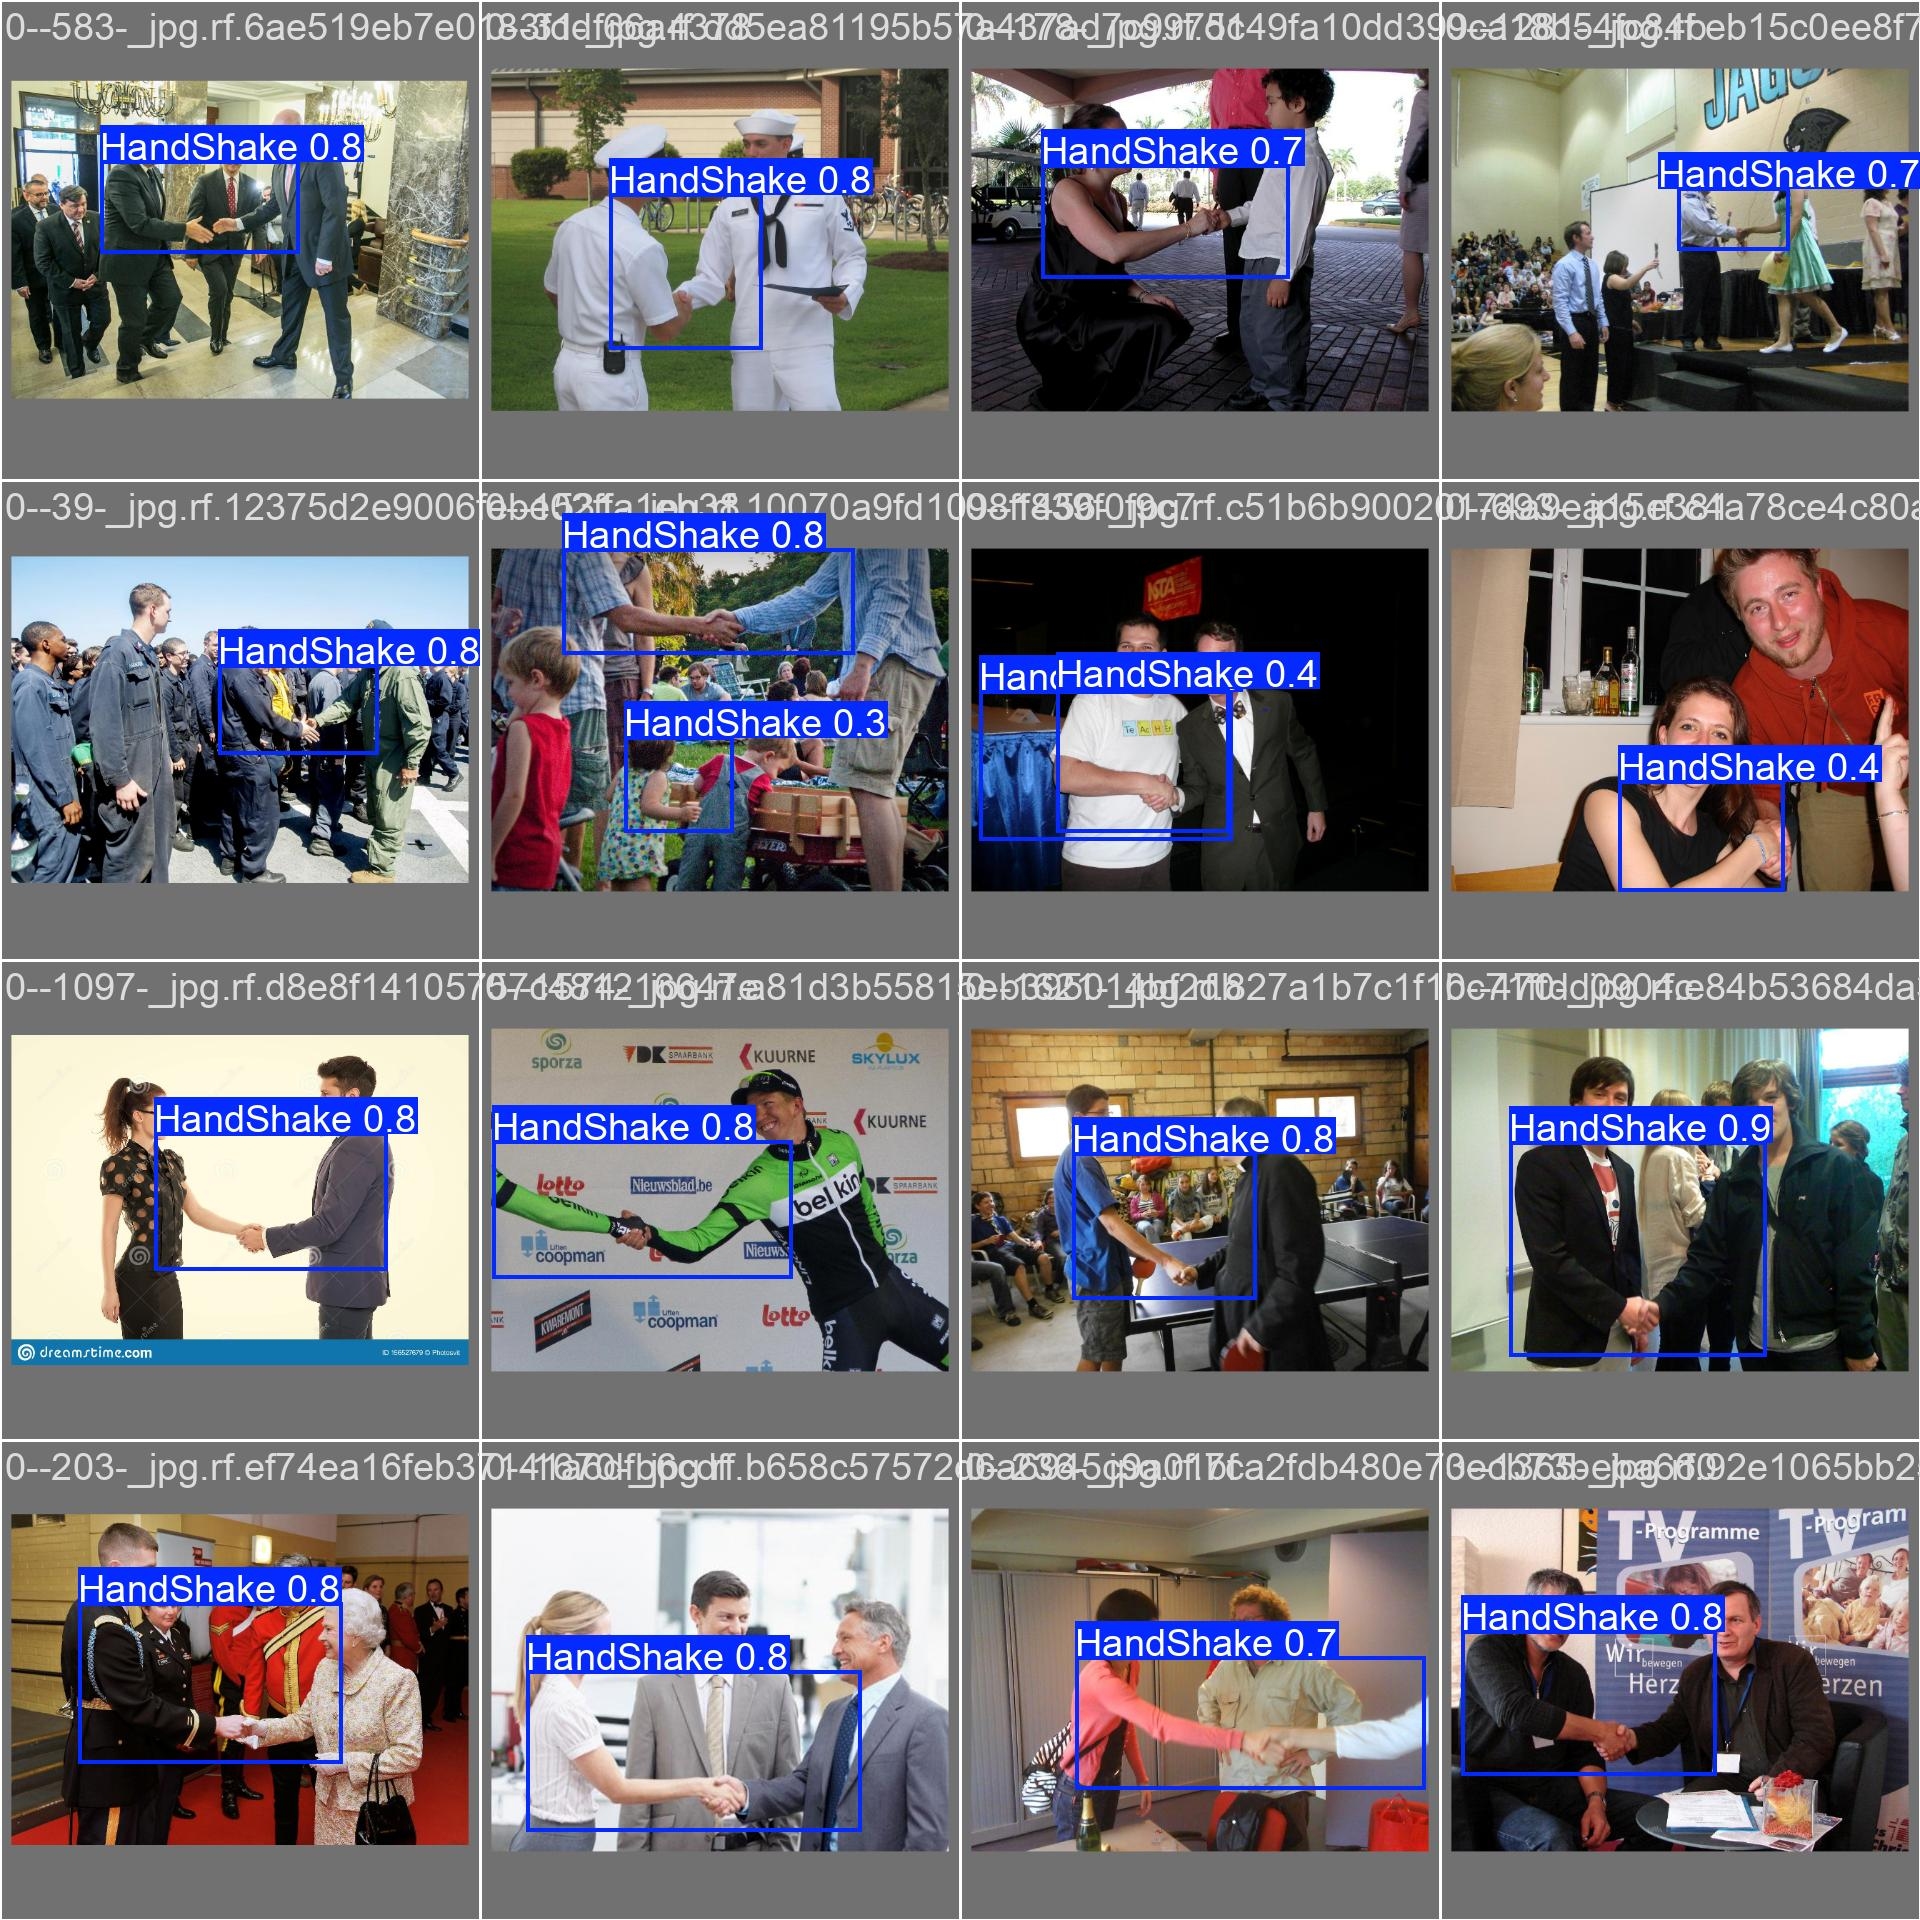

In [20]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

**Step # 07 Validação do modelo**

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/HandShake-2/valid/labels.cache... 98 images, 1 backgrounds, 0 corrupt: 100% 98/98 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:03<00:00,  2.02it/s]
                   all         98        100      0.957       0.94      0.963      0.597
Speed: 2.5ms preprocess, 10.6ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Step # 08 Inferência na base de imagens de teste após fine-tune do modelo**

In [23]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.50 source={dataset.location}/test/images save=True

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/49 /content/HandShake-2/test/images/0--1034-_jpg.rf.1e45ee89a0d69690057e4a554ee3273f.jpg: 448x640 1 HandShake, 48.8ms
image 2/49 /content/HandShake-2/test/images/0--105-_jpg.rf.f9feed859b281f2b947ec261808ced08.jpg: 448x640 1 HandShake, 9.0ms
image 3/49 /content/HandShake-2/test/images/0--1094-_jpg.rf.c21f508e6f129000e489f56979996b7b.jpg: 512x640 1 HandShake, 42.8ms
image 4/49 /content/HandShake-2/test/images/0--1104-_jpg.rf.a6bd6a0712011b88f657273b9abceab8.jpg: 480x640 1 HandShake, 45.3ms
image 5/49 /content/HandShake-2/test/images/0--1108-_jpg.rf.f60a93341e3f0509fe060908733e6b2e.jpg: 384x640 1 HandShake, 43.4ms
image 6/49 /content/HandShake-2/test/images/0--1117-_jpg.rf.1a2c970800e5d5ce16c327b86b70cf2b.jpg: 416x640 1 HandShake, 45.6ms
image 7/49 /content/HandShake-2/test/images/0--1164-_jpg.rf.c993a44a051baad7d8c5

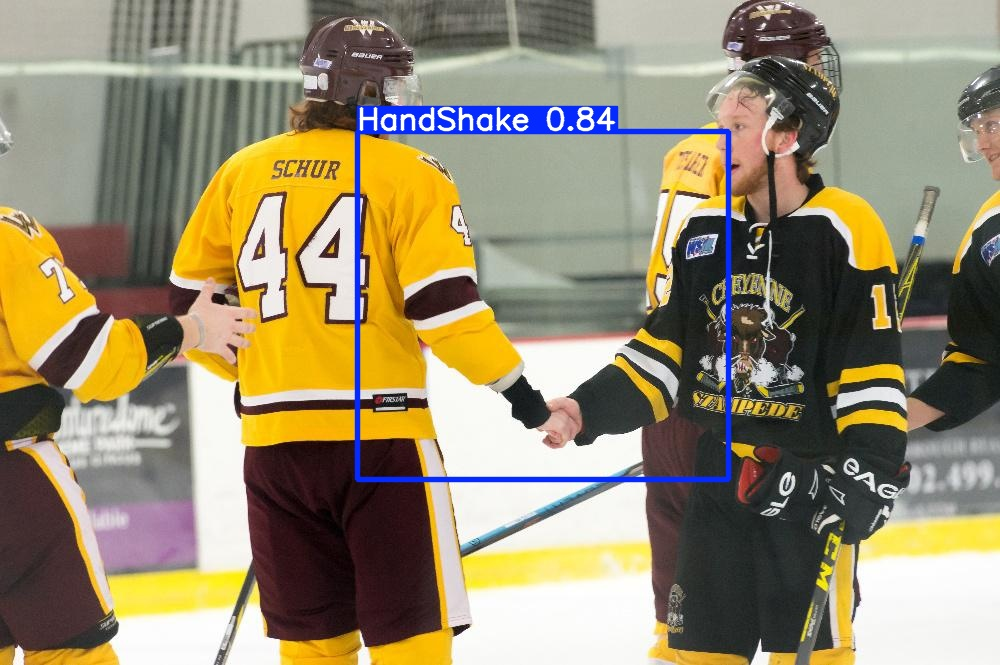

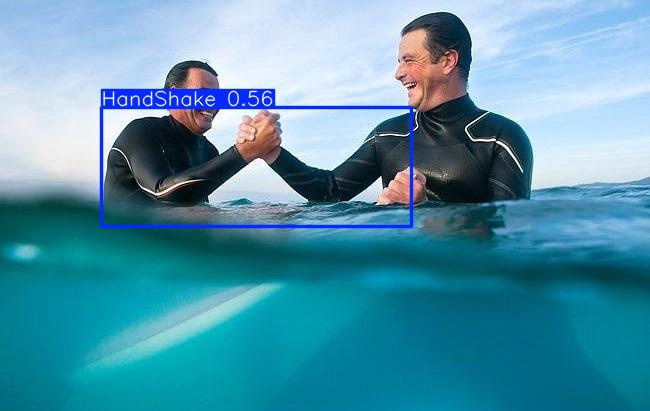

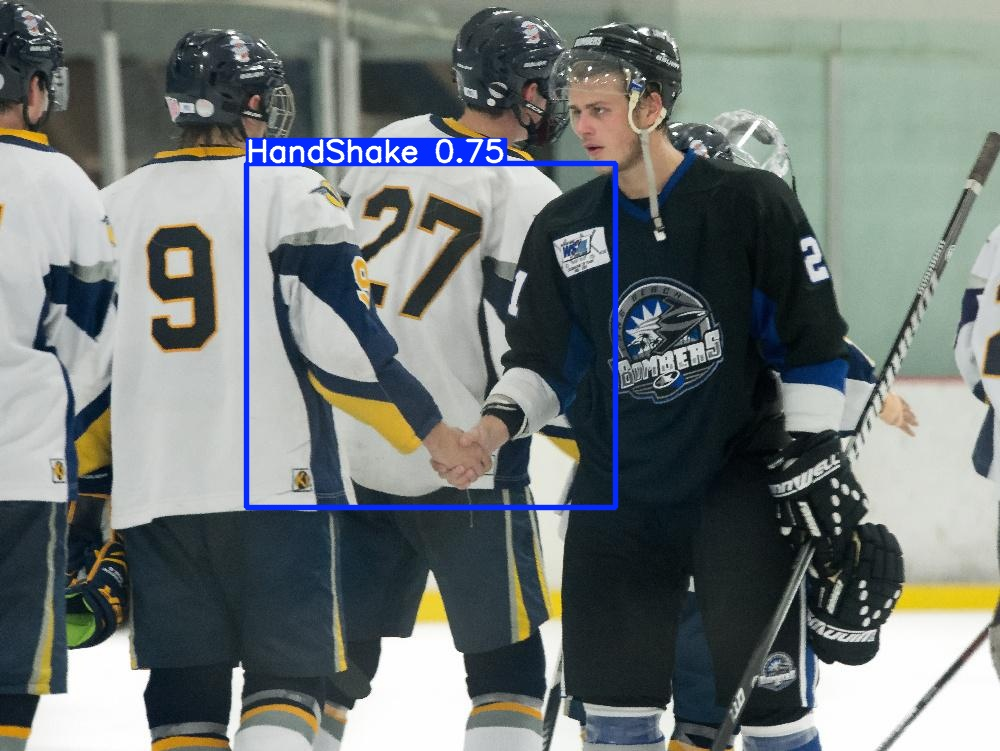

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

**Step # 08 Inferência com modelo customizado em vídeo**

In [32]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.70 source="video_138_to_143.mp4" save=True

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/210) /content/video_138_to_143.mp4: 384x640 (no detections), 51.1ms
video 1/1 (frame 2/210) /content/video_138_to_143.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 3/210) /content/video_138_to_143.mp4: 384x640 (no detections), 10.4ms
video 1/1 (frame 4/210) /content/video_138_to_143.mp4: 384x640 (no detections), 10.0ms
video 1/1 (frame 5/210) /content/video_138_to_143.mp4: 384x640 (no detections), 9.8ms
video 1/1 (frame 6/210) /content/video_138_to_143.mp4: 384x640 (no detections), 10.2ms
video 1/1 (frame 7/210) /content/video_138_to_143.mp4: 384x640 (no detections), 10.4ms
video 1/1 (frame 8/210) /content/video_138_to_143.mp4: 384x640 (no detections), 10.1ms
video 1/1 (frame 9/210) /content/video_138_to_143.mp4: 384x640 (no detections), 9.4ms
video 1/1 (frame 10/210) /content/video_138_to_143.mp

In [33]:
!rm '/content/result_compressed.mp4'

In [34]:
from IPython.display import HTML
from base64 import b64encode
import os

# Caminho indicado na inferência 'Results saved to ...'
save_path = '//content/runs/detect/predict/video_138_to_143.avi'

# Conversão do vídeo para mp4
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Exibe vídeo
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)